<h1><center> Drug Prediction </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

In this project, data about a set of patients are analyzed. All of them suffered from the same illnes. During their course of treatment, each patient responsed to one of 5 medications, Druge A, Drug B, Drug C, Drug X and Drug Y. A model is developed to predict which drug should be prescripted for a certain patient. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Describe</li>
                <li>Visualization</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>Model Development</a>
            <ul>
                <li>Decision Tree</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

In [1]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import warnings
warnings.filterwarnings('ignore')

## 1. Download Data

In [3]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'

In [4]:
#download the data
patient_data = pd.read_csv(file_name)

In [5]:
# size of data 
NR = np.size(patient_data,0)
NC = np.size(patient_data,1)
print('There are ', NR, ' samples of data and ', NC, ' properties')

There are  200  samples of data and  6  properties


In [6]:
#display the first 10 rows of data
patient_data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


There are 10 columns in this dataset. Data look all clean. 

## 2. Data Wrangling

In [7]:
#Evaluating the missing data
missing_data = patient_data.isnull()
missing_data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


"True" measn the data is missing. From the first 10 rows, there seems no missing data. 

In [8]:
#Here use info() to count non-null values or missing values in each column
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


There are no missing values. 

"Sex", "BP", "Chholesterol" are all categorical data. We need to convert them to numerical values to use Decision Trees. 

In [9]:
X = patient_data[["Age","Sex","BP","Cholesterol","Na_to_K"]].values

In [10]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [11]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [12]:
#Let's fill the target variable
Y = patient_data["Drug"]

## 3. Exploratory Data Analysis

Data Exploratory or data analysis is requried to find the features or characteristics of the data. 

In [13]:
patient_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [14]:
group_one = patient_data[['Age','Drug']]

group_one = group_one.groupby(['Drug'],as_index=False).mean()
group_one

,Drug,Age
0,drugA,35.869565
1,drugB,62.500000
2,drugC,42.500000
3,drugX,44.018519
4,drugY,43.747253


In [15]:
patient_data['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

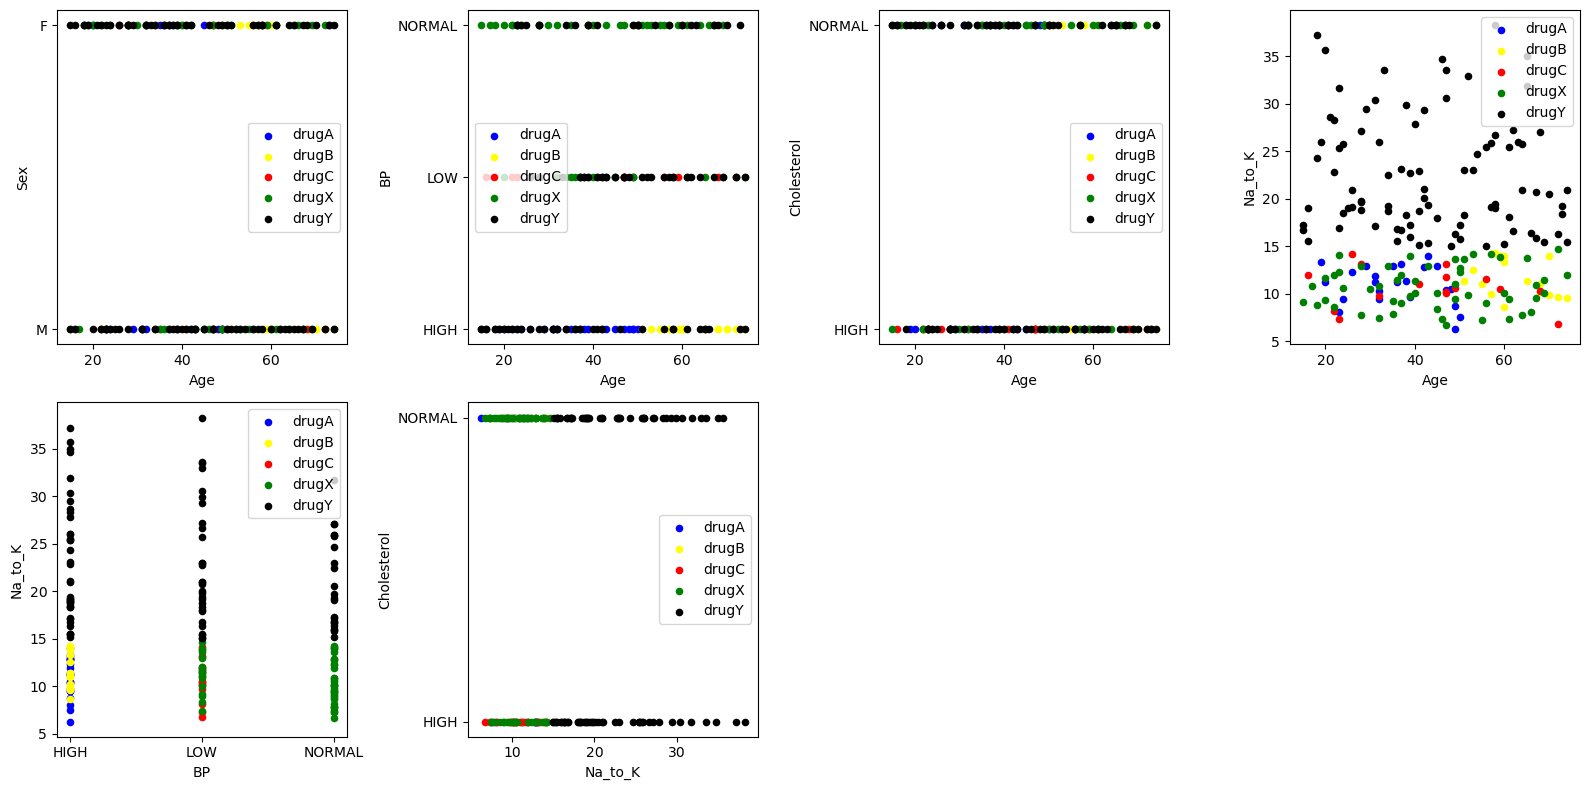

In [16]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(241)
patient_data[patient_data['Drug'] == 'drugA'].plot.scatter(x='Age', y='Sex', color='Blue', label='drugA', ax=ax)
patient_data[patient_data['Drug'] == 'drugB'].plot.scatter(x='Age', y='Sex', color='Yellow', label='drugB', ax=ax)
patient_data[patient_data['Drug'] == 'drugC'].plot.scatter(x='Age', y='Sex', color='Red', label='drugC', ax=ax)
patient_data[patient_data['Drug'] == 'drugX'].plot.scatter(x='Age', y='Sex', color='Green', label='drugX', ax=ax)
patient_data[patient_data['Drug'] == 'drugY'].plot.scatter(x='Age', y='Sex', color='Black', label='drugY', ax=ax)
plt.tight_layout()

ax = fig.add_subplot(242)
patient_data[patient_data['Drug'] == 'drugA'].plot.scatter(x='Age', y='BP', color='Blue', label='drugA', ax=ax)
patient_data[patient_data['Drug'] == 'drugB'].plot.scatter(x='Age', y='BP', color='Yellow', label='drugB', ax=ax)
patient_data[patient_data['Drug'] == 'drugC'].plot.scatter(x='Age', y='BP', color='Red', label='drugC', ax=ax)
patient_data[patient_data['Drug'] == 'drugX'].plot.scatter(x='Age', y='BP', color='Green', label='drugX', ax=ax)
patient_data[patient_data['Drug'] == 'drugY'].plot.scatter(x='Age', y='BP', color='Black', label='drugY', ax=ax)
plt.tight_layout()

ax = fig.add_subplot(243)
patient_data[patient_data['Drug'] == 'drugA'].plot.scatter(x='Age', y='Cholesterol', color='Blue', label='drugA', ax=ax)
patient_data[patient_data['Drug'] == 'drugB'].plot.scatter(x='Age', y='Cholesterol', color='Yellow', label='drugB', ax=ax)
patient_data[patient_data['Drug'] == 'drugC'].plot.scatter(x='Age', y='Cholesterol', color='Red', label='drugC', ax=ax)
patient_data[patient_data['Drug'] == 'drugX'].plot.scatter(x='Age', y='Cholesterol', color='Green', label='drugX', ax=ax)
patient_data[patient_data['Drug'] == 'drugY'].plot.scatter(x='Age', y='Cholesterol', color='Black', label='drugY', ax=ax)
plt.tight_layout()

ax = fig.add_subplot(244)
patient_data[patient_data['Drug'] == 'drugA'].plot.scatter(x='Age', y='Na_to_K', color='Blue', label='drugA', ax=ax)
patient_data[patient_data['Drug'] == 'drugB'].plot.scatter(x='Age', y='Na_to_K', color='Yellow', label='drugB', ax=ax)
patient_data[patient_data['Drug'] == 'drugC'].plot.scatter(x='Age', y='Na_to_K', color='Red', label='drugC', ax=ax)
patient_data[patient_data['Drug'] == 'drugX'].plot.scatter(x='Age', y='Na_to_K', color='Green', label='drugX', ax=ax)
patient_data[patient_data['Drug'] == 'drugY'].plot.scatter(x='Age', y='Na_to_K', color='Black', label='drugY', ax=ax)
plt.tight_layout()

ax = fig.add_subplot(245)
patient_data[patient_data['Drug'] == 'drugA'].plot.scatter(x='BP', y='Na_to_K', color='Blue', label='drugA', ax=ax)
patient_data[patient_data['Drug'] == 'drugB'].plot.scatter(x='BP', y='Na_to_K', color='Yellow', label='drugB', ax=ax)
patient_data[patient_data['Drug'] == 'drugC'].plot.scatter(x='BP', y='Na_to_K', color='Red', label='drugC', ax=ax)
patient_data[patient_data['Drug'] == 'drugX'].plot.scatter(x='BP', y='Na_to_K', color='Green', label='drugX', ax=ax)
patient_data[patient_data['Drug'] == 'drugY'].plot.scatter(x='BP', y='Na_to_K', color='Black', label='drugY', ax=ax)
plt.tight_layout()

ax = fig.add_subplot(246)
patient_data[patient_data['Drug'] == 'drugA'].plot.scatter(x='Na_to_K', y='Cholesterol', color='Blue', label='drugA', ax=ax)
patient_data[patient_data['Drug'] == 'drugB'].plot.scatter(x='Na_to_K', y='Cholesterol', color='Yellow', label='drugB', ax=ax)
patient_data[patient_data['Drug'] == 'drugC'].plot.scatter(x='Na_to_K', y='Cholesterol', color='Red', label='drugC', ax=ax)
patient_data[patient_data['Drug'] == 'drugX'].plot.scatter(x='Na_to_K', y='Cholesterol', color='Green', label='drugX', ax=ax)
patient_data[patient_data['Drug'] == 'drugY'].plot.scatter(x='Na_to_K', y='Cholesterol', color='Black', label='drugY', ax=ax)
plt.tight_layout()


### 4. Model Development

In this section, I will develop a Decision Tree model to predict drug. 

#### 4.0 Decistion Tree

Data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

In [19]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [20]:
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
pred = drugTree.predict(x_test)

In [22]:
print (pred [0:5])
print (y_test [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


#### 4.1 Evaluation

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred))

DecisionTrees's Accuracy:  0.9833333333333333


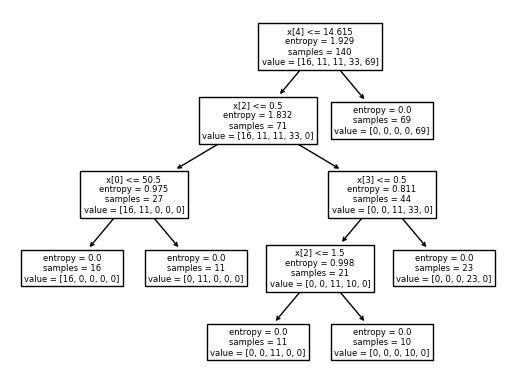

In [24]:
tree.plot_tree(drugTree)
plt.show()

It looks like Decision Tree did a pretty good job. 